<a href="https://colab.research.google.com/github/Suresh18698/Health_insurance/blob/main/Health_insurance_pred.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **Health Insurance Cost Prediction**

General Information


## **-> Problem Description**

Identifying the cost of health insurance policy that should be applied by a person, based on their characteristics.

## > Dataset Information

This dataset contains 1338 rows of insured data, where the Insurance charges are given against the following attributes of the insured:
*  Age
*  Sex
*  BMI
*  Number of Children
*  Smoker
*  Region


**-> Libraries Used**
*   Numpy
*   Pandas
*   Matplotlib
*   Seaborn
*   Sklearn







## 1. Importing The Required Libraries

In [ ]:
# to manipulate the data
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
# ML models
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
import xgboost as xgb

In [ ]:
# for splitting the data into train and test sets
from sklearn.model_selection import train_test_split

# for hyperparameter tuning
from sklearn.model_selection import GridSearchCV

In [ ]:
# evaluation metrics
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score
from sklearn.model_selection import cross_val_score

## 2. Loading the Dataset

In [ ]:
# reading data from the dataset and storing it as a dataframe
df = pd.read_csv("/content/insurance.csv")
df.head()

,age,sex,bmi,children,smoker,region,expenses
0,19,female,27.9,0,yes,southwest,16884.92
1,18,male,33.8,1,no,southeast,1725.55
2,28,male,33.0,3,no,southeast,4449.46
3,33,male,22.7,0,no,northwest,21984.47
4,32,male,28.9,0,no,northwest,3866.86


In [ ]:
min(df["age"]), max(df["age"])

(18, 64)

In [ ]:
min(df["bmi"]), max(df["bmi"])

(16.0, 53.1)

In [ ]:
min(df["children"]), max(df["children"])

(0, 5)

In [ ]:
df["age"].dtype

dtype('int64')

In [ ]:
# viewing the shape of the dataframe
df.shape

(1338, 7)

In [ ]:
max(df["bmi"]), min(df["bmi"])

(53.1, 16.0)

In [ ]:
# checking for null values
df.isna().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
expenses    0
dtype: int64

In [ ]:
# checking the datatypes of each column
df.dtypes

age           int64
sex          object
bmi         float64
children      int64
smoker       object
region       object
expenses    float64
dtype: object

In [ ]:
df["region"].value_counts()

southeast    364
southwest    325
northwest    325
northeast    324
Name: region, dtype: int64

## 2.1. Plotting Information about the data

In [ ]:
# plotting a bar chart for the passed values
def plot_bar_chart(X, y, xlabel, ylabel):
    title = str(xlabel+" vs. "+ylabel,)
    plt.bar(X, y)
    plt.title(title+"\n")
    plt.xlabel("\n"+xlabel)
    plt.ylabel(ylabel+"\n");

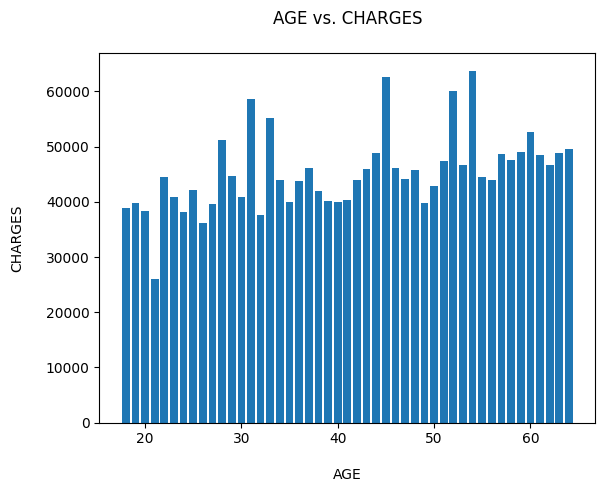

In [ ]:
# age vs expenses
plot_bar_chart(df["age"], df["expenses"],"AGE", "CHARGES")

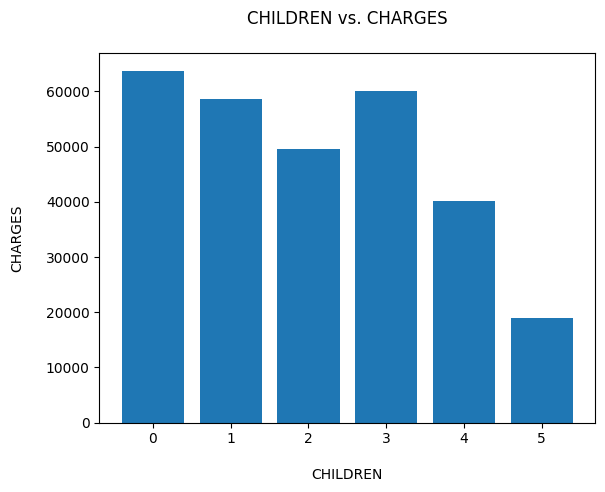

In [ ]:
# children vs expenses
plot_bar_chart(df["children"], df["expenses"],"CHILDREN", "CHARGES")

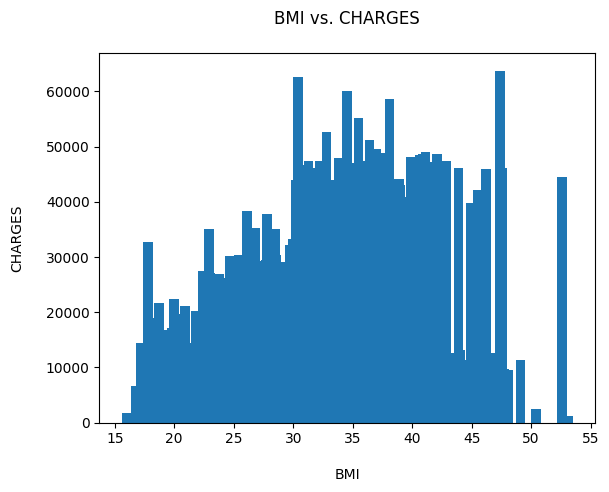

In [ ]:
# bmi vs expenses
plot_bar_chart(df["bmi"], df["expenses"],"BMI", "CHARGES")

## 3. Preprocessing the Data

In [ ]:
# taking a copy of the original dataframe
temp_df = df.copy(deep=False)

# Turning the categorical columns into numbers
temp_df["sex"] = pd.Categorical(df["sex"]).codes.astype("float")
temp_df["smoker"] = pd.Categorical(df["smoker"]).codes.astype("float")
temp_df["region"] = pd.Categorical(temp_df["region"]).codes.astype("float")+1
temp_df["children"] = temp_df["children"].astype("float")
temp_df["age"] = temp_df["age"].astype("float")

# viewing the dataframe
temp_df.head()

,age,sex,bmi,children,smoker,region,expenses
0,19.0,0.0,27.9,0.0,1.0,4.0,16884.92
1,18.0,1.0,33.8,1.0,0.0,3.0,1725.55
2,28.0,1.0,33.0,3.0,0.0,3.0,4449.46
3,33.0,1.0,22.7,0.0,0.0,2.0,21984.47
4,32.0,1.0,28.9,0.0,0.0,2.0,3866.86


In [ ]:
# original data is unaffected
df.head()

,age,sex,bmi,children,smoker,region,expenses
0,19,female,27.9,0,yes,southwest,16884.92
1,18,male,33.8,1,no,southeast,1725.55
2,28,male,33.0,3,no,southeast,4449.46
3,33,male,22.7,0,no,northwest,21984.47
4,32,male,28.9,0,no,northwest,3866.86


In [ ]:
# datatypes of all the columns are converted into float
temp_df.dtypes

age         float64
sex         float64
bmi         float64
children    float64
smoker      float64
region      float64
expenses    float64
dtype: object

In [ ]:
temp_df["region"].value_counts()

3.0    364
4.0    325
2.0    325
1.0    324
Name: region, dtype: int64

In [ ]:
df["region"].value_counts()

southeast    364
southwest    325
northwest    325
northeast    324
Name: region, dtype: int64

In [ ]:
# Splitting features and target
X = temp_df.drop(["expenses"], axis=1)
y = df["expenses"]
X.shape, y.shape

((1338, 6), (1338,))

## 3.1. Correlation Matrix

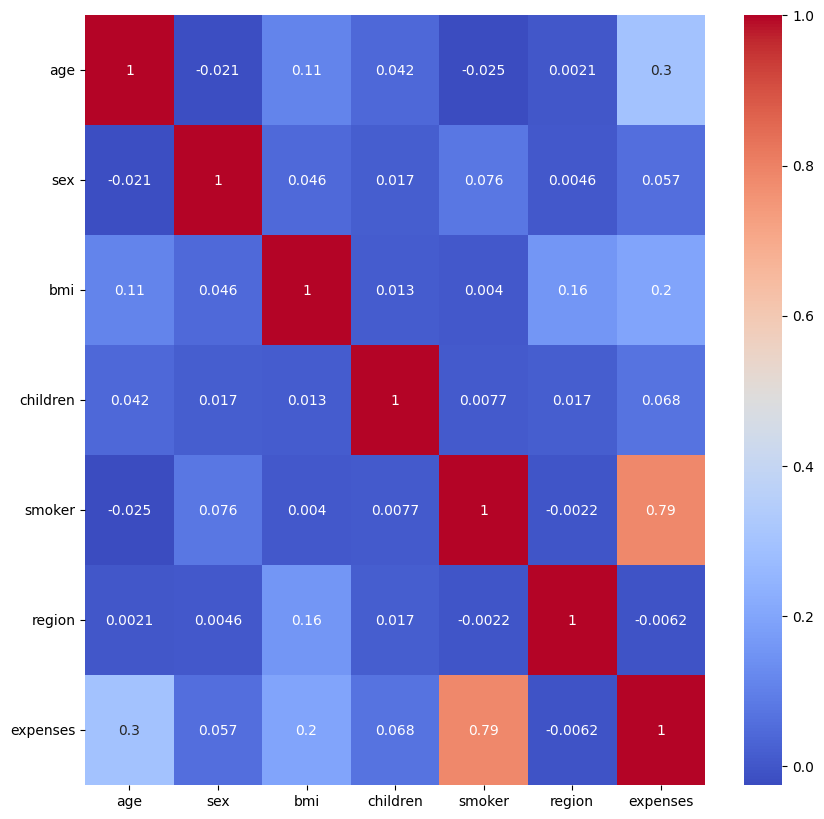

In [ ]:
# plotting a Correlation Matrix
fig, ax = plt.subplots(figsize=(10,10))
ax = sns.heatmap(temp_df.corr(), annot=True, cmap="coolwarm")
plt.yticks(rotation=0);
# based on the color of the squares, feature's correlation with target can be identified

In [ ]:
# removing the features that are negatively correlated with the target
X = X.drop(["region"], axis=1)
X.head()

,age,sex,bmi,children,smoker
0,19.0,0.0,27.9,0.0,1.0
1,18.0,1.0,33.8,1.0,0.0
2,28.0,1.0,33.0,3.0,0.0
3,33.0,1.0,22.7,0.0,0.0
4,32.0,1.0,28.9,0.0,0.0


## 3.2. Splitting the data into Train and Test Splits

In [ ]:
# splitting the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=True ,random_state=42)
len(X_train), len(X_test)

(1070, 268)

In [ ]:
X_train[:3]

,age,sex,bmi,children,smoker
560,46.0,0.0,20.0,2.0,0.0
1285,47.0,0.0,24.3,0.0,0.0
1142,52.0,0.0,24.9,0.0,0.0


In [ ]:
type(X_train)

pandas.core.frame.DataFrame

## 4. Evaluating Models

In [ ]:
# creating a metrics dataframe to store the results
metrics_df = pd.DataFrame(columns=["RandomForestRegressor", "DecisionTreeRegressor", "LinearRegression", "SVR", "XGBRegressor", "XGBRFRegressor"],
                          index=["R2_Score", "Mean_absolute_error","Mean_squared_error", "cross_val_r2_score","cross_val_mae", "cross_val_mse"])


In [ ]:
np.random.seed=42
# creating a dictionary of models to iterate over each model
models = {
    "RandomForestRegressor": RandomForestRegressor(),
    "DecisionTreeRegressor": DecisionTreeRegressor(),
    "LinearRegression": LinearRegression(),
    "SVR": SVR(),
    "XGBRegressor": xgb.XGBRegressor(),
    "XGBRFRegressor": xgb.XGBRFRegressor()
}

# iterating over the models dictionary
for key, value in models.items():
    # fitting the model
    value.fit(X_train, y_train)
    # making predictions
    y_preds = value.predict(X_test)

    # calculating the evaluation metrics to determine which model performs best out of selected models
    # calculating 5-fold cross validated r2_score, mean_absolute_error, mean_squared_error
    cv_r2_score = abs(np.mean(cross_val_score(value, X_train, y_train, cv=5, scoring="r2")))
    cv_mae_score = abs(np.mean(cross_val_score(value, X_train, y_train, cv=5, scoring="neg_mean_absolute_error")))
    cv_mse_score = abs(np.mean(cross_val_score(value,X_train, y_train, cv=5, scoring="neg_mean_squared_error")))

    # calculating r2_score, mean_absolute_error, mean_squared_error without cross validation
    metrics_df[key] = [float(f"{r2_score(y_test, y_preds):.4f}")*100,
                     f"{mean_absolute_error(y_test, y_preds):.4f}",
                    f"{mean_squared_error(y_test, y_preds):.4f}",
                    float(f"{cv_r2_score:.4f}")*100, f"{cv_mae_score:.4f}", f"{cv_mse_score:.4f}"]

metrics_df

,RandomForestRegressor,DecisionTreeRegressor,LinearRegression,SVR,XGBRegressor,XGBRFRegressor
R2_Score,85.82,72.17,78.11,-7.22,83.49,86.75
Mean_absolute_error,2516.5793,3105.4917,4213.8357,8590.1349,2852.2761,2567.3758
Mean_squared_error,22021523.8061,43208294.5071,33982750.4644,166462274.8479,25634102.3545,20573490.4647
cross_val_r2_score,81.15,68.67,73.38,10.14,78.46,84.05
cross_val_mae,2861.6245,3214.0178,4237.6436,8260.6984,3210.7539,2665.5428
cross_val_mse,26037167.4309,43784301.3614,37844133.3858,158711259.2297,30598545.5258,22543839.6979




*   The XGBRFRegressor Model performs well than all the other models




## 5. Hyperparameter Tuning

*   We choose the XGBRFRegressor model for hyperparameter tuning




In [ ]:
# setting random seed
np.random.seed=42
model = xgb.XGBRFRegressor(random_state=42)

# getting the model's hyperparameters in order to tune them
model.get_params()

{'colsample_bynode': 0.8,
 'learning_rate': 1.0,
 'reg_lambda': 1e-05,
 'subsample': 0.8,
 'objective': 'reg:squarederror',
 'base_score': None,
 'booster': None,
 'callbacks': None,
 'colsample_bylevel': None,
 'colsample_bytree': None,
 'device': None,
 'early_stopping_rounds': None,
 'enable_categorical': False,
 'eval_metric': None,
 'feature_types': None,
 'gamma': None,
 'grow_policy': None,
 'importance_type': None,
 'interaction_constraints': None,
 'max_bin': None,
 'max_cat_threshold': None,
 'max_cat_to_onehot': None,
 'max_delta_step': None,
 'max_depth': None,
 'max_leaves': None,
 'min_child_weight': None,
 'missing': nan,
 'monotone_constraints': None,
 'multi_strategy': None,
 'n_estimators': None,
 'n_jobs': None,
 'num_parallel_tree': None,
 'random_state': 42,
 'reg_alpha': None,
 'sampling_method': None,
 'scale_pos_weight': None,
 'tree_method': None,
 'validate_parameters': None,
 'verbosity': None}

## 5.1. Performing GridSearchCV

In [ ]:
 #Creating a parameter grid to try out different combinations of hyperparameters
param = {
    'max_depth': [None, 4],
    'n_estimators': np.arange(10, 100, 10),
    'tree_method': [None, "auto", "exact"],
}

gd = GridSearchCV(model, param, cv=5, n_jobs=-1)
gd.fit(X_train, y_train)

# getting the best score obtained by GridSearchCV
gd.best_score_*100

84.90674726452676

In [ ]:
# getting the best parameters obtained by performing GridSearchCV
gd.best_params_

{'max_depth': 4, 'n_estimators': 70, 'tree_method': None}

In [ ]:
# testing out the best parameters obtained by GridSearchCV on test data
temp_model = xgb.XGBRFRegressor(
    tree_method = None,
    n_estimators = 90,
    max_depth = 4,
    random_state=42
)
# fitting the model
temp_model.fit(X_train, y_train)

# scoring the tuned model on test data
temp_model.score(X_test, y_test)*100, np.mean(cross_val_score(temp_model, X_test, y_test, cv=5))*100

(86.93943788076062, 85.74440222584292)

## 6. Creating a Final model and Exporting it

In [ ]:
temp_df.head()

,age,sex,bmi,children,smoker,region,expenses
0,19.0,0.0,27.9,0.0,1.0,4.0,16884.92
1,18.0,1.0,33.8,1.0,0.0,3.0,1725.55
2,28.0,1.0,33.0,3.0,0.0,3.0,4449.46
3,33.0,1.0,22.7,0.0,0.0,2.0,21984.47
4,32.0,1.0,28.9,0.0,0.0,2.0,3866.86


In [ ]:
# creating a final model from the hyperparameters obtained by performing GridSearchCV
final_model = xgb.XGBRegressor(
    tree_method = None,
    n_estimators = 90,
    max_depth = 4,
    random_state=42
)

# since this is the final model that we are going to deploy we train it with all the data
final_model.fit(X, y)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=4, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=90, n_jobs=None,
             num_parallel_tree=None, random_state=42, ...)

In [ ]:
# xgb model require this special function to save and load
final_model.save_model("predictor.json")

In [ ]:
loaded_model = xgb.XGBRFRegressor()
loaded_model.load_model("predictor.json")
loaded_model.score(X_test, y_test)*100

95.09990521279089

In [ ]:
metrics_df

,RandomForestRegressor,DecisionTreeRegressor,LinearRegression,SVR,XGBRegressor,XGBRFRegressor
R2_Score,85.82,72.17,78.11,-7.22,83.49,86.75
Mean_absolute_error,2516.5793,3105.4917,4213.8357,8590.1349,2852.2761,2567.3758
Mean_squared_error,22021523.8061,43208294.5071,33982750.4644,166462274.8479,25634102.3545,20573490.4647
cross_val_r2_score,81.15,68.67,73.38,10.14,78.46,84.05
cross_val_mae,2861.6245,3214.0178,4237.6436,8260.6984,3210.7539,2665.5428
cross_val_mse,26037167.4309,43784301.3614,37844133.3858,158711259.2297,30598545.5258,22543839.6979


In [ ]:
metrics_df.to_csv("Metrics.csv")